In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [7]:
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 1. iris 데이터 프레임 시각화

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

```
sns.scatterplot('petal width (cm)', 'petal legnth (cm)',
                hue='target',
                palette='muted',
                data=df_iris
                )
plt.title('Petal')
plt.show()
```

```
sns.scatterplot('sepal width (cm)', 'sepal legnth (cm)',
                hue='target',
                palette='muted',
                data=df_iris
                )
plt.title('Sepal')
plt.show()
```

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris.target, stratify=df_iris.target)

<ipython-input-10-3be8b4f9e18e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris.target, stratify=df_iris.target)


# 2. Logistic Regression

* [다큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* 영국의 통계학자인 D.R.Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결함을 이용하여 사건의 발생 가능성을 예측하는데 사용하는 통계 기법
* 로지스틱 회귀, 서포트 벡터 머신과 같은 알고리즘은 이진 분류만 가능 (2개의 클래스 판별만 가능)
  * 하지만 3개 이상의 클래스에 대한 판별을 진행하는 경우 아래와 같은 전략을 사용
    1. One-vs-Rest (OvR): K개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별
    2. One-vs-One (OvO): 4개의 계정을 구분하는 클래스가 존재한다고 할때 Ovs1, Ovs2, ..., 2vs3, ,,,,까지의 n x (n-1) / 2개의 분류가를 만들어 가장 많이 양성으로 선택된 클래스를 판별
    3. 대부분의 모델은 OvsR 전략을 선호

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)
pred = model.predict(x_valid)
(pred == y_valid).mean()

1.0

# 3. SGDClassifier

* Stochastic Gradient Descent(SGD): 확률적 경사 하강법
* [다큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
* 전체 데이터가 아닌 랜덤하게 추출한 일부 데이터 한 개에 대해서 그래디언트를 계산하고 경사 하강 알고리즘을 적용하는 방법
* 학습 중간 과정에서 결과의 진폭이 크고 불안정하지만 속도가 매우 빠름

In [14]:
from IPython.display import Image

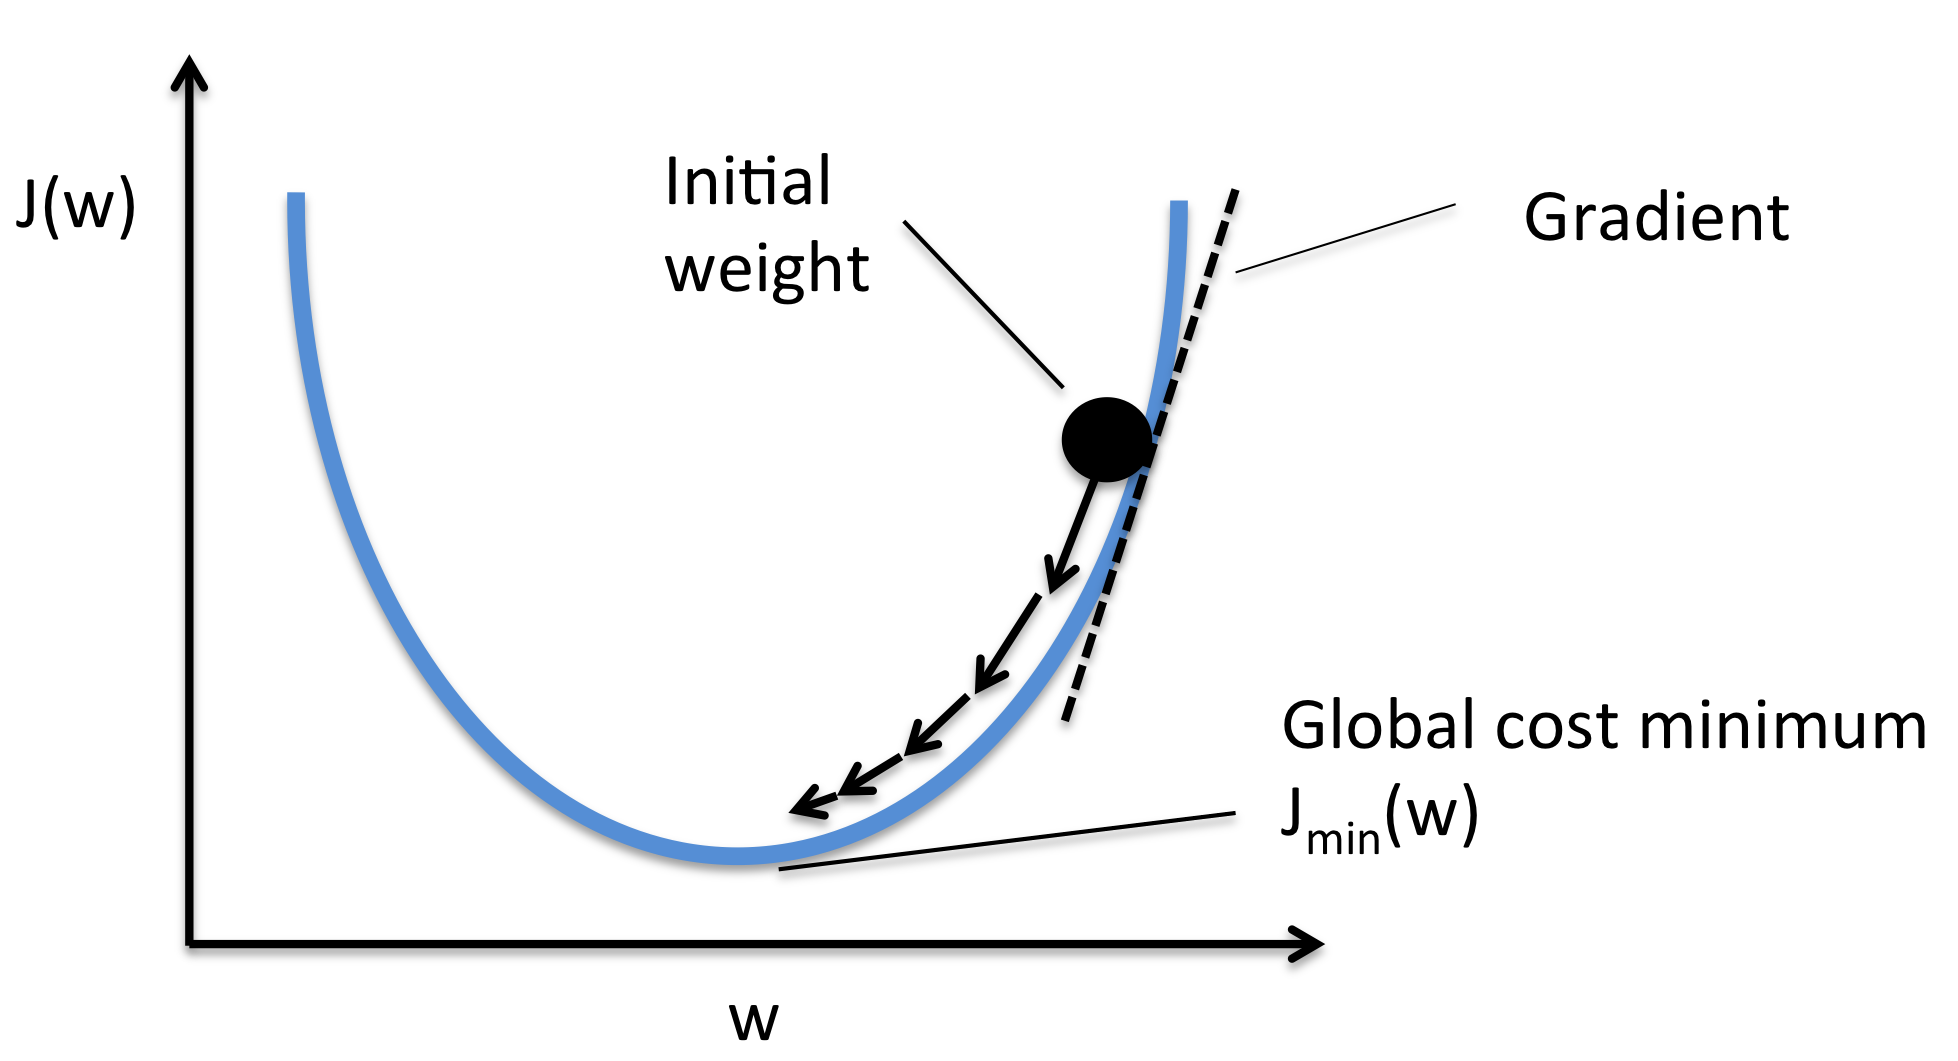

In [15]:
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
# random_state= 0 seed 값 고정
sgd = SGDClassifier(random_state=0)

In [18]:
pred = sgd.fit(x_train, y_train).predict(x_valid)
(pred == y_valid).mean()

0.8947368421052632

### 3-1. Hyperparameter 튜닝
* 각 알고리즘 별 하이퍼 파라미터의 종류는 매우 다양함
* 문서를 보고 적절한 가설을 세운 후 적용하여 검증
* 하이퍼 파라미터는 자동으로 절하는 기능도 있음

In [19]:
sgd = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1, l1_ratio=0.2)

In [20]:
pred = sgd.fit(x_train, y_train).predict(x_valid)
(pred == y_valid).mean()

0.7894736842105263

> 데이터에 따라 성능이 달라질 수도 있고, 하이퍼 파라미터에 따라서도 달라질 수 있다.

# 4. K-Neighbors-Classifier

* 최근접 이웃 알고리즘
* [다큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier() #n_neighbors = 5

In [23]:
knn = KNeighborsClassifier(n_neighbors=12) # 데이터가 많아질수록 속도가 떨어지고 성능이 올라감

In [24]:
pred = knn.fit(x_train, y_train).predict(x_valid)

In [25]:
(pred == y_valid).mean()

1.0

# 5. SVC (Support Vector Machine)

* 새로운 데이터가 어느 카테고리에 속할지 판닿나느 비확률적 이진 선형 분류 모델을 만듬
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘
* LogisticRegression과 같이 이진 분류만 가능
* OvsR 전략 사용
*[다큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

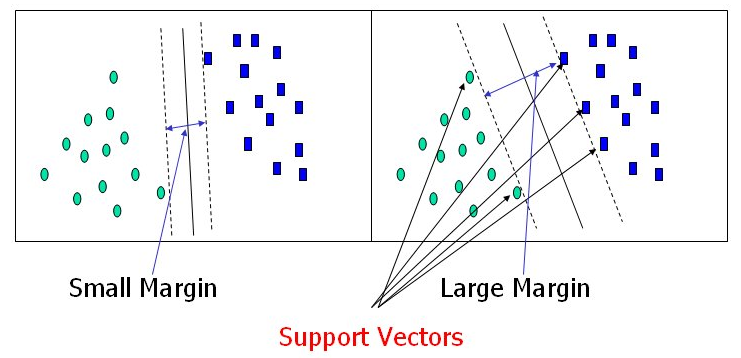

In [26]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC(random_state=0)

In [29]:
pred = svc.fit(x_train, y_train).predict(x_valid)

In [30]:
svc

SVC(random_state=0)

In [31]:
(pred == y_valid).mean()

1.0

In [32]:
# prediction을 만든 기준
svc.decision_function(x_valid)[:5]
# [0이 될 확률, 1이 될 확률, 2가 될 확률]

array([[-0.24108425,  1.1483913 ,  2.2147532 ],
       [ 2.23157666,  1.15360232, -0.25263113],
       [ 2.23418448,  1.11003875, -0.24685981],
       [-0.22333928,  2.2359335 ,  0.90615564],
       [ 2.21893994,  1.17317872, -0.24990079]])

In [33]:
pred[:5]

array([2, 0, 0, 1, 0])

# 6. Decision Tree

* 스무고개처럼 나무 가지치기를 통해 소그룹으로 나눠 판별하는 방법
* [다큐먼트](https://scikit-learn.org/stable/modules/tree.html)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc = DecisionTreeClassifier(random_state=0)

In [36]:
pred = dtc.fit(x_train, y_train).predict(x_valid)

In [37]:
(pred == y_valid).mean()

0.9210526315789473

In [38]:
from sklearn.tree import export_graphviz
from subprocess import call

In [39]:
# gini 개수: 불순도를 의미. 계수가 높을 수록 엔트로피가 크다는 의미
# 엔트로피: 클래스가 얼마나 혼잡하게 섞여있는지를 의미
# gini 지수가 0이라면 하나의 classified로 구분됨
# gini 지수가 높다면 덜 분류됐기 때문에 분류를 이어가야함

def graph_tree(model):
  # 이 모델이 어떻게 진행되는건지 print, 확장명 파일이 .dot
  export_graphviz(model, out_file='tree.dot')
  call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])
  return Image(filename='decision-tree.png', width=700)

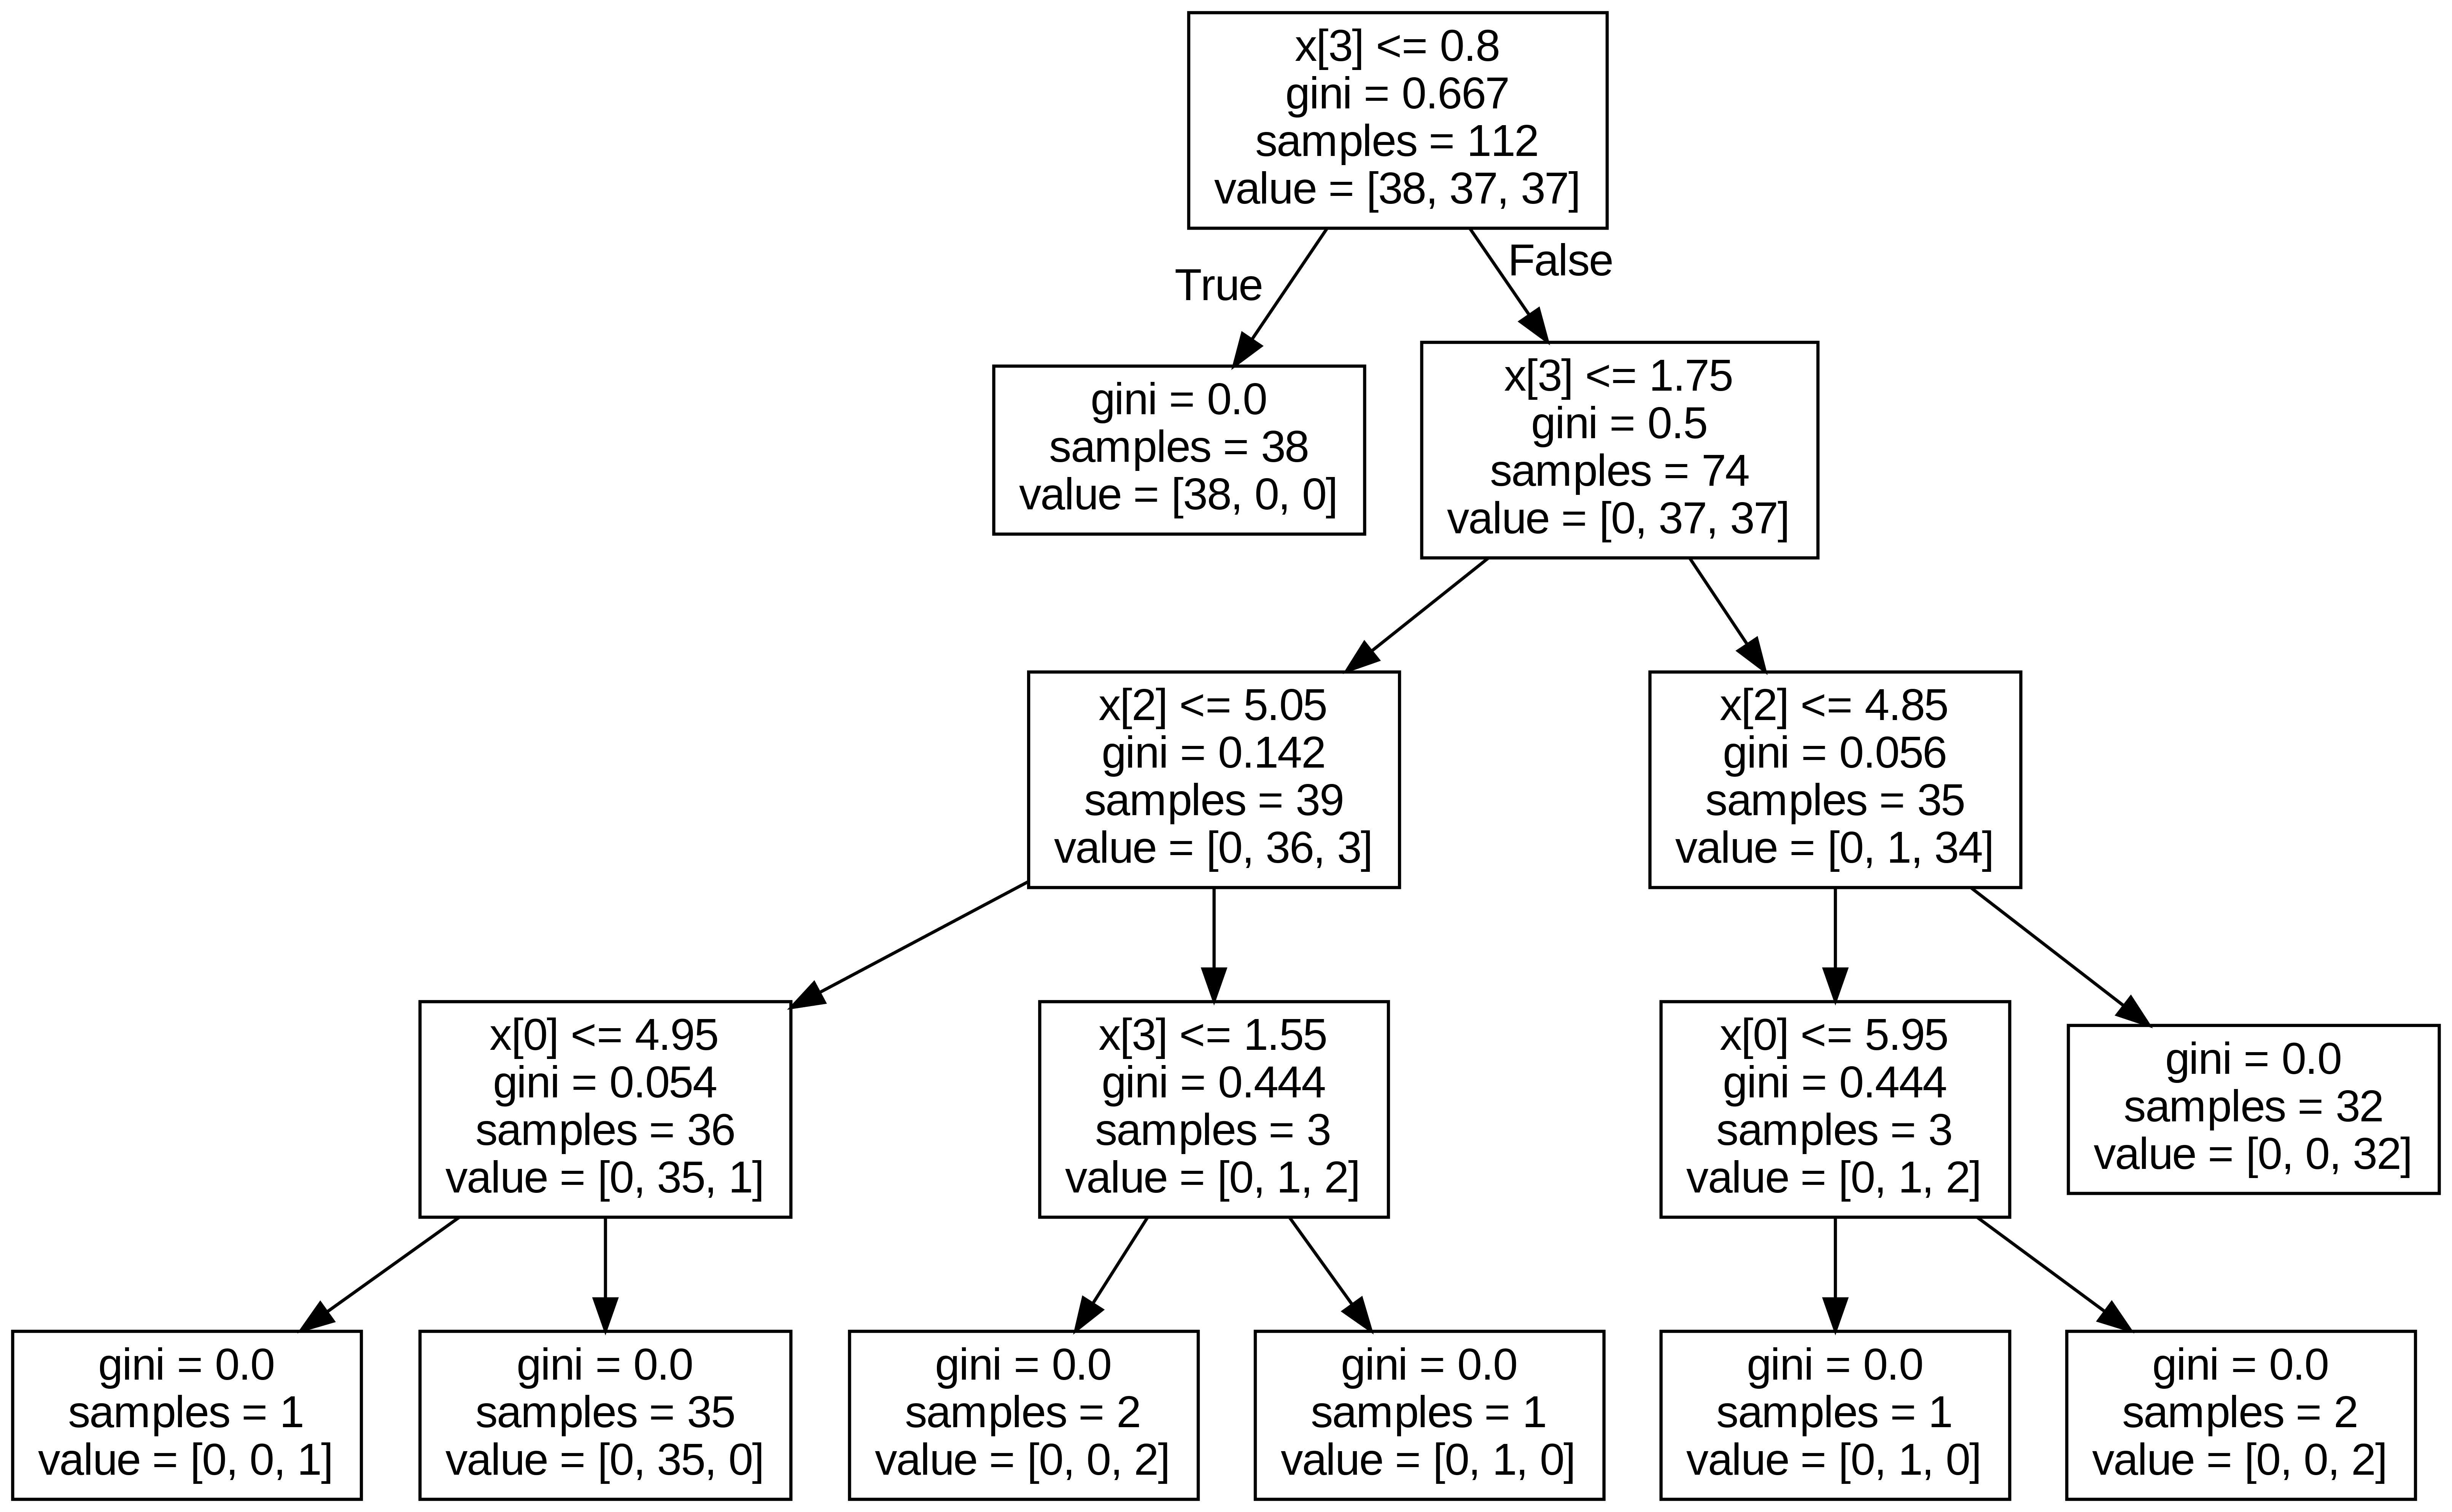

In [40]:
graph_tree(dtc)

In [41]:
# max_depth : 세번의 스무고개만 하겠다
dtc = DecisionTreeClassifier(random_state=0, max_depth=3)
pred = dtc.fit(x_train, y_train).predict(x_valid)

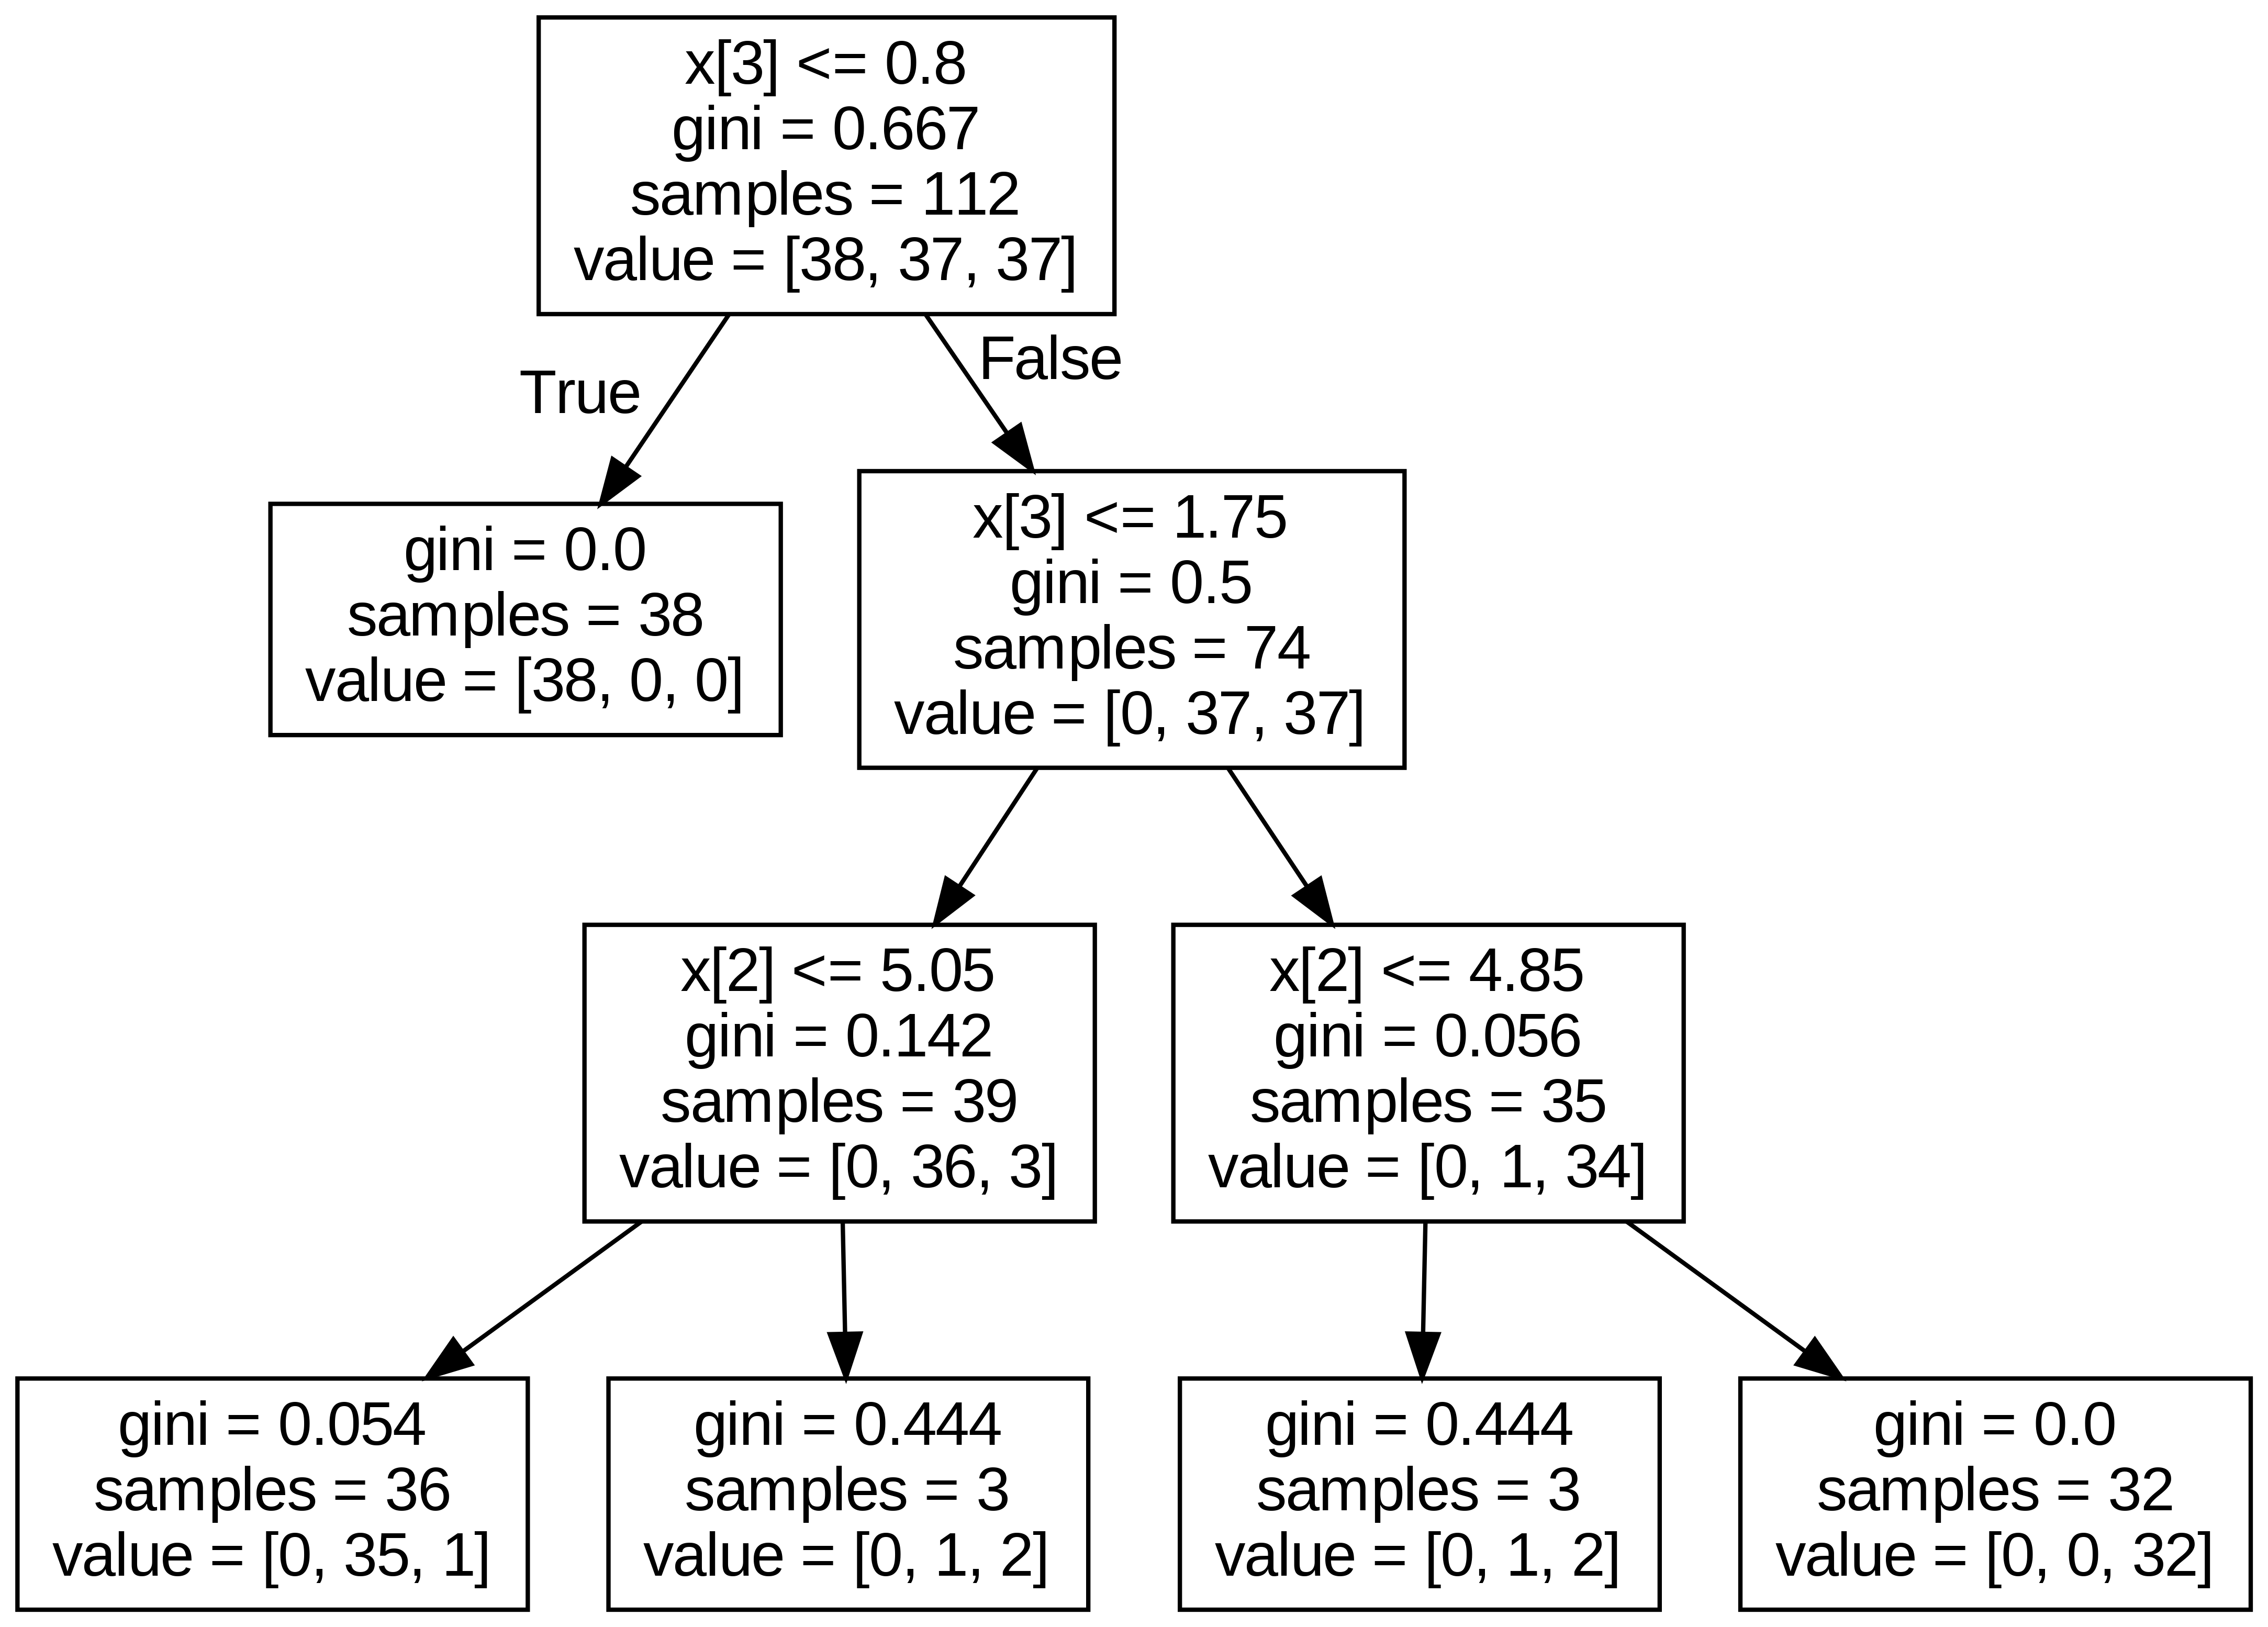

In [42]:
graph_tree(dtc)

# 7. 오차 Error

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [44]:
cancer = load_breast_cancer()

In [45]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [46]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [47]:
# target: 악성종양:0, 양성종양:1
pos = df.loc[df.target == 1]
neg = df.loc[df.target == 0]

In [48]:
pos.shape, neg.shape

((357, 31), (212, 31))

In [49]:
# positive 전체와 negative 10개를 합침
# sort=True 순서대로 넣어지기 때문에 neg가 밑에 합쳐지는게 아니라 섞임
sample = pd.concat([pos, neg[:10]], sort=True)

In [50]:
sample.shape

(367, 31)

> 이렇게 한쪽으로 target이 쏠린 경우는, 머신이 (확률적으로 한쪽으로의 데이터 쏠림이 있기 때문에) 한쪽으로만 쏠리도록 하여 학습을 한건지, 정말 제대로 학습을 해서 결과를 도출한 것인지 헷갈림.
> 그래서 아래의 방법을 통해 오차를 확인하고 학습을 판별

In [51]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample.target, random_state=0)

<ipython-input-51-1d26e9d18e50>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample.target, random_state=0)


In [52]:
model = LogisticRegression()
pred = model.fit(x_train, y_train).predict(x_test)
(pred == y_test).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [53]:
# all 1로 채워진 y_test와 size가 같은 array를 만듬
my_pred = np.ones(shape=y_test.shape)

In [54]:
(my_pred == y_test).mean()

0.9891304347826086

> 위의 예측한 머신러닝과 아래의 돌팔이 의사가 별 차이가 없음 : 오차
> 정확도를 구분해내는 방법이 필요

# 8. 오차 행렬 Confusion Matrix

* 분류 모델이 정확한지 평가할 때 활용

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 0, 91]])

<Axes: >

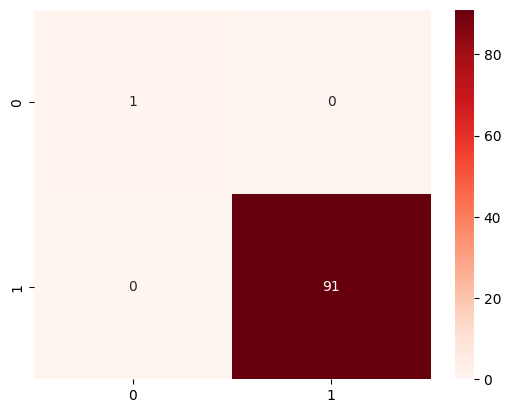

In [59]:
# annot=True: 각 셀에 숫자를 입력; 0=Negative, 1=Positive
# 행: 실제값이 False, True
# 열: 예측값이 긍정, 부정
'''
               Negative (예측)     Positive(예측)
False(실제)       FN                  FP
True(실제)        TN                  TP
'''
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds')

* best: TP, FN
* bad: TF
* worst: FP

### 8-1. precision_score 정밀도
* TP를 구하는 방법
* precision_scroe formula: TP / P = TP /(FP + TP)


In [ ]:
from sklearn.metrics import precision_score

In [61]:
precision_score(y_test, pred)

1.0

### 8-2. recall_score() 재현율
* formula: TP / (FN + TP)
* 정확하게 감지한 양성 샘플의 비율
* 민감도 혹은 TPR(True Positive Rate)이라고 부르기도 함


In [ ]:
from sklearn.metrics import recall_score

In [65]:
recall_score(y_test, pred)

1.0

### 8-3. f1 score
* 정밀도와 재현율의 조화 평균을 나타내는 지표
* $$2*\frac{정밀도 * 재현율}{정밀도 + 재현율} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

In [66]:
from sklearn.metrics import f1_score

In [67]:
f1_score(y_test, pred)

1.0